# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Retrieve data

In [2]:
dataset = pd.read_csv('../raw_data/HR_Engagement_Sat_Sales_UpdatedV4.0.csv')

In [3]:
pd.set_option('display.max_columns', None)
dataset.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [4]:
dataset.shape

(14999, 62)

# Imputer

In [5]:
dataset_col = dataset.columns
dataset_types = dataset.dtypes

In [6]:
imputer = SimpleImputer(strategy="most_frequent") 

# Call the "fit" method on the object
imputer.fit(dataset) 

# Call the "transform" method on the object
dataset = imputer.transform(dataset) 

In [7]:
type(dataset)

numpy.ndarray

In [8]:
dataset = pd.DataFrame(dataset, columns=dataset_col)
dataset = dataset.astype(dataset_types)

In [9]:
type(dataset)

pandas.core.frame.DataFrame


# Define X and y


In [10]:
X = dataset.drop(columns=['left_Company', 'Name', 'ID'])
X.shape

(14999, 59)

In [11]:
y = dataset['left_Company']
y.shape

(14999,)

In [12]:
y.value_counts()/len(y)*100

left_Company
0    76.191746
1    23.808254
Name: count, dtype: float64

In [13]:
features = X.columns
features;

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Department                             14999 non-null  object 
 1   GEO                                    14999 non-null  object 
 2   Role                                   14999 non-null  object 
 3   Rising_Star                            14999 non-null  float64
 4   Will_Relocate                          14999 non-null  int64  
 5   Critical                               14999 non-null  float64
 6   Trending Perf                          14999 non-null  int64  
 7   Talent_Level                           14999 non-null  int64  
 8   Validated_Talent_Level                 14999 non-null  int64  
 9   Percent_Remote                         14999 non-null  float64
 10  EMP_Sat_OnPrem_1                       14999 non-null  float64
 11  EM

# Encoding object type columns

In [15]:
one_hot_encoder = OneHotEncoder(sparse_output = False)
one_hot_encoder.fit(X.select_dtypes(include=[object]))

OneHotEncoder(sparse_output=False)

In [16]:
# Display the generated names
print(f"The column names for the encoded values are {one_hot_encoder.get_feature_names_out()}")

The column names for the encoded values are ['Department_Finance' 'Department_Human Resources' 'Department_IT'
 'Department_Operations' 'Department_Sales' 'Department_Warehouse'
 'GEO_Australia' 'GEO_China' 'GEO_Colombia' 'GEO_France' 'GEO_Japan'
 'GEO_Korea' 'GEO_Turkey' 'GEO_UK' 'GEO_US' 'Role_Director' 'Role_Level 1'
 'Role_Level 2-4' 'Role_Manager' 'Role_Senior Director'
 'Role_Senior Manager' 'Role_VP' 'sales_IT' 'sales_RandD'
 'sales_accounting' 'sales_hr' 'sales_management' 'sales_marketing'
 'sales_product_mng' 'sales_sales' 'sales_support' 'sales_technical'
 'salary_high' 'salary_low' 'salary_medium' 'Gender_F' 'Gender_M']


In [17]:
# Transform the current column
X[one_hot_encoder.get_feature_names_out()] = one_hot_encoder.transform(X.select_dtypes(include=[object]))
X.head()

,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),Department_Finance,Department_Human Resources,Department_IT,Department_Operations,Department_Sales,Department_Warehouse,GEO_Australia,GEO_China,GEO_Colombia,GEO_France,GEO_Japan,GEO_Korea,GEO_Turkey,GEO_UK,GEO_US,Role_Director,Role_Level 1,Role_Level 2-4,Role_Manager,Role_Senior Director,Role_Senior Manager,Role_VP,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,Gender_F,Gender_M
0,Operations,US,VP,1.0,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,5.0,0,sales,low,M,5,4,3,1,1,1,1,2,1,1.0,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,Sales,UK,Senior Director,1.0,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,5.0,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,1.0,2,2,1,4,1,3,2,5,1,5,1990,90,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Finance,France,Senior Director,1.0,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,5.0,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,1.0,1,5,1,2,5,2,2,4,4,4,3193,80,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,Human Resources,China,Senior Director,1.0,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,5.0,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,1.0,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,IT,Korea,Director,1.0,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,5.0,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,1.0,1,4,1,5,3,5,1,2,5,4,3149,80,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [31]:
X.select_dtypes(include=[object]).columns

Index([], dtype='object')

In [32]:
X =X.drop(columns=X.select_dtypes(include=[object]).columns)
X.head()

,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,CSR Factor,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),Department_Finance,Department_Human Resources,Department_IT,Department_Operations,Department_Sales,Department_Warehouse,GEO_Australia,GEO_China,GEO_Colombia,GEO_France,GEO_Japan,GEO_Korea,GEO_Turkey,GEO_UK,GEO_US,Role_Director,Role_Level 1,Role_Level 2-4,Role_Manager,Role_Senior Director,Role_Senior Manager,Role_VP,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,Gender_F,Gender_M
0,0.0,-0.999667,0.0,0.0,0.0,0.0,-1.121168,0.0,0.391455,0.391455,0.391455,0.852086,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,-0.651538,-0.661782,-0.341235,2.432112,0.0,-0.147412,-0.713863,0.706023,-0.010208,-1.413786,-1.417496,-1.115417,-1.104762,0.001849,-1.156345,0.41680,0.174859,-0.151123,0.714878,-0.139760,-0.710533,-0.698923,-0.693458,0.374196,-0.708174,-1.421983,1.404261,-0.891785,-2.339462,1.004882,-0.447231,-0.447231,-0.447231,2.235979,-0.447231,-0.447124,-0.342773,-0.353606,-0.352651,-0.357413,-0.353845,-0.355751,-0.350257,-0.366017,2.861916,-0.214542,-0.528012,-0.921653,-0.438616,-0.149988,-0.310642,11.634197,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132,-1.012951,1.012951
1,0.0,-0.999667,0.0,0.0,0.0,0.0,-1.121168,0.0,0.391455,0.391455,0.391455,0.852086,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,0.971113,-0.841993,-1.026126,-0.411165,0.0,-0.147412,2.077564,-0.001320,-0.010208,0.700761,-0.002029,-0.138132,-1.104762,0.001849,-1.156345,-2.39923,0.174859,-0.151123,-0.696807,-1.110253,0.711860,-1.407004,0.014490,0.374196,1.419469,-1.421983,1.404261,-0.806918,1.659100,0.618484,-0.447231,-0.447231,-0.447231,-0.447231,2.235979,-0.447124,-0.342773,-0.353606,-0.352651,-0.357413,-0.353845,-0.355751,-0.350257,2.732114,-0.349416,-0.214542,-0.528012,-0.921653,-0.438616,6.667197,-0.310642,-0.085954,-0.298486,-0.235321,4.307599,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,-0.417791,-0.470655,-0.299809,1.024775,-0.868132,0.987214,-0.987214
2,0.0,-0.999667,0.0,0.0,0.0,0.0,-1.121168,0.0,0.391455,0.391455,0.391455,0.852086,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,-1.462863,1.620892,-0.341235,-0.411165,0.0,-0.147412,1.234869,-0.708664,0.695373,-1.413786,-0.002029,-1.115417,-1.104762,0.001849,0.011602,0.41680,0.174859,-1.119792,1.420721,-1.110253,-0.710533,1.425321,-0.693458,0.374196,0.710255,0.705460,0.696134,-0.121715,0.280286,0.618484,2.235979,-0.447231,-0.447231,-0.447231,-0.447231,-0.447124,-0.342773,-0.353606,-0.352651,2.797880,-0.353845,-0.355751,-0.350257,-0.366017,-0.349416,-0.214542,-0.528012,-0.921653,-0.438616,6.667197,-0.310642,-0.085954,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,3.953303,-0.617455,-0.417791,-0.470655,-0.299809,-0.975824,1.151898,0.987214,-0.987214
3,0.0,-0.999667,0.0,0.0,0.0,0.0,-1.121168,0.0,0.391455,0.391455,0.391455,0.852086,-1.08207

In [20]:
X.shape

(14999, 90)

# PCA

## Standardizing X

⚠️ Data must be centered around its mean before applying PCA ⚠️

In [21]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [22]:
X = pd.DataFrame(scaler.transform(X), columns=X.columns)
X.head()

,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,CSR Factor,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),Department_Finance,Department_Human Resources,Department_IT,Department_Operations,Department_Sales,Department_Warehouse,GEO_Australia,GEO_China,GEO_Colombia,GEO_France,GEO_Japan,GEO_Korea,GEO_Turkey,GEO_UK,GEO_US,Role_Director,Role_Level 1,Role_Level 2-4,Role_Manager,Role_Senior Director,Role_Senior Manager,Role_VP,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,Gender_F,Gender_M
0,0.0,-0.999667,0.0,0.0,0.0,0.0,-1.121168,0.0,0.391455,0.391455,0.391455,0.852086,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,-0.651538,-0.661782,-0.341235,2.432112,0.0,-0.147412,-0.713863,0.706023,-0.010208,-1.413786,-1.417496,-1.115417,-1.104762,0.001849,-1.156345,0.41680,0.174859,-0.151123,0.714878,-0.139760,-0.710533,-0.698923,-0.693458,0.374196,-0.708174,-1.421983,1.404261,-0.891785,-2.339462,1.004882,-0.447231,-0.447231,-0.447231,2.235979,-0.447231,-0.447124,-0.342773,-0.353606,-0.352651,-0.357413,-0.353845,-0.355751,-0.350257,-0.366017,2.861916,-0.214542,-0.528012,-0.921653,-0.438616,-0.149988,-0.310642,11.634197,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132,-1.012951,1.012951
1,0.0,-0.999667,0.0,0.0,0.0,0.0,-1.121168,0.0,0.391455,0.391455,0.391455,0.852086,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,0.971113,-0.841993,-1.026126,-0.411165,0.0,-0.147412,2.077564,-0.001320,-0.010208,0.700761,-0.002029,-0.138132,-1.104762,0.001849,-1.156345,-2.39923,0.174859,-0.151123,-0.696807,-1.110253,0.711860,-1.407004,0.014490,0.374196,1.419469,-1.421983,1.404261,-0.806918,1.659100,0.618484,-0.447231,-0.447231,-0.447231,-0.447231,2.235979,-0.447124,-0.342773,-0.353606,-0.352651,-0.357413,-0.353845,-0.355751,-0.350257,2.732114,-0.349416,-0.214542,-0.528012,-0.921653,-0.438616,6.667197,-0.310642,-0.085954,-0.298486,-0.235321,4.307599,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,-0.417791,-0.470655,-0.299809,1.024775,-0.868132,0.987214,-0.987214
2,0.0,-0.999667,0.0,0.0,0.0,0.0,-1.121168,0.0,0.391455,0.391455,0.391455,0.852086,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,-1.462863,1.620892,-0.341235,-0.411165,0.0,-0.147412,1.234869,-0.708664,0.695373,-1.413786,-0.002029,-1.115417,-1.104762,0.001849,0.011602,0.41680,0.174859,-1.119792,1.420721,-1.110253,-0.710533,1.425321,-0.693458,0.374196,0.710255,0.705460,0.696134,-0.121715,0.280286,0.618484,2.235979,-0.447231,-0.447231,-0.447231,-0.447231,-0.447124,-0.342773,-0.353606,-0.352651,2.797880,-0.353845,-0.355751,-0.350257,-0.366017,-0.349416,-0.214542,-0.528012,-0.921653,-0.438616,6.667197,-0.310642,-0.085954,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,3.953303,-0.617455,-0.417791,-0.470655,-0.299809,-0.975824,1.151898,0.987214,-0.987214
3,0.0,-0.999667,0.0,0.0,0.0,0.0,-1.121168,0.0,0.391455,0.391455,0.391455,0.852086,-1.08207

In [23]:
X.shape

(14999, 90)

<Axes: >

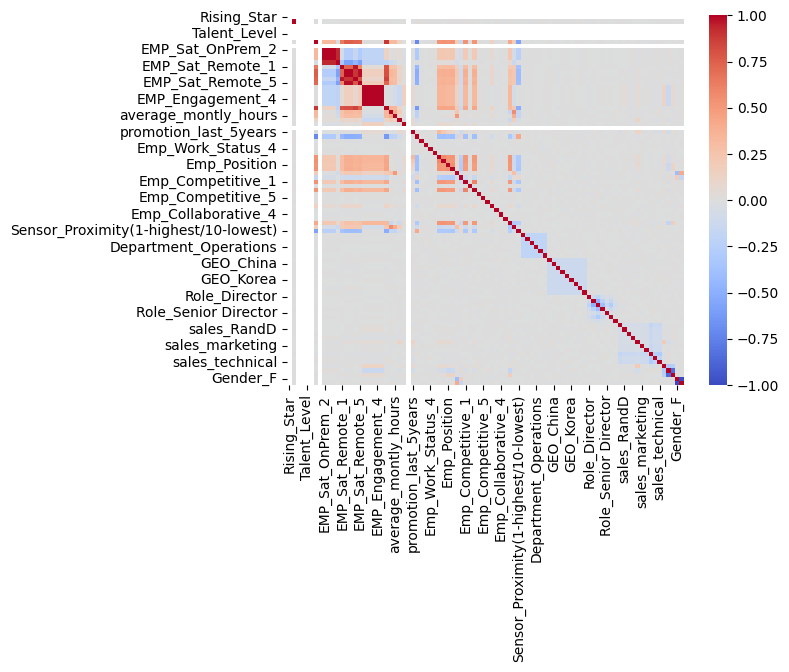

In [24]:
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

## Computing Principal Components

In [25]:
pca = PCA()
pca.fit(X)

PCA()

In [26]:
# Access our PCs 
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=X.columns,
                 columns=[f'PC{i}' for i in range(1, len(W)+1)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90
Rising_Star,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000
Will_Relocate,3.596357e-03,2.785037e-03,7.051786e-04,2.792638e-03,3.867126e-03,-1.524953e-02,-7.888289e-03,-2.725531e-02,-4.408342e-03,2.784447e-02,7.344603e-02,1.436961e-02,2.969047e-02,3.684970e-02,2.863876e-02,-5.081624e-02,6.648100e-02,-1.104293e-01,-1.896918e-02,3.544374e-02,8.579747e-02,5.475295e-02,1.672929e-04,6.082590e-02,-6.935753e-02,7.165057e-02,-4.416645e-02,-1.696262e-01,-2.058958e-01,-1.586442e-01,-6.130155e-02,1.390413e-01,-1.063949e-01,-3.327550e-01,5.661689e-03,5.289182e-02,-3.164146e-01,-8.901158e-02,4.055852e-01,3.935459e-02,2.778129e-01,1.577913e-02,-1.490735e-02,1.062514e-01,-9.087640e-02,2.127153e-02,2.232177e-01,2.589815e-01,4.400011e-01,1.194908e-01,-7.874194e-03,1.250657e-02,1.178995e-02,2.635060e-02,5.141399e-03,-1.820099e-02,-1.717602e-02,-8.767571e-03,1.302423e-03,1.968229e-04,-4.729856e-03,4.373776e-04,-2.564422e-03,-1.819985e-03,7.954740e-03,2.188122e-05,5.330993e-04,-3.850426e-04,-7.183178e-33,-4.358224e-17,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000
Critical,-5.551115e-17,-0.000000e+00,1.387779e-17,-7.632783e-17,-1.249001e-16,2.220446e-16,1.665335e-16,-2.775558e-17,1.734723e-16,4.163336e-17,-5.551115e-17,6.938894e-18,0.000000e+00,0.000000e+00,5.551115e-17,-1.387779e-16,-1.387779e-16,5.551115e-17,2.081668e-17,-4.163336e-17,-1.942890e-16,-1.526557e-16,3.567025e-17,-2.498002e-16,2.914335e-16,8.326673e-17,2.081668e-17,1.387779e-16,2.498002e-16,-1.942890e-16,1.387779e-16,-0.000000e+00,4.857226e-17,8.326673e-17,2.203099e-16,1.040834e-17,-9.020562e-17,6.938894e-17,4.163336e-17,6.212478e-17,-4.163336e-17,-2.558717e-16,-5.030698e-17,-7.632783e-17,4.024558e-16,-4.857226e-17,1.665335e-16,2.775558e-17,3.330669e-16,3.330669e-16,-1.821460e-16,6.245005e-17,-1.249001e-16,2.914335e-16,1.387779e-17,-5.828671e-16,-4.302114e-16,9.020562e-17,2.949030e-17,3.256943e-16,-4.510281e-16,6.158268e-17,-5.412337e-16,-1.016548e-15,6.245005e-16,1.846234e-15,1.974983e-15,1.303801e-13,-9.000626e-02,5.699208e-02,-0.083973,0.040712,-0.236370,0.026299,0.080081,0.095385,0.092430,-0.193006,0.0,0.280629,-0.038303,-0.047129,0.073387,0.242591,-0.141500,0.160712,0.088277,0.739808,-0.128337,-0.312997
Trending Perf,-0.000000e+00,5.551115e-17,-6.245005e-17,-7.242471e-17,-2.688821e-16,-0.000000e+00,-6.938894e-17,2.775558e-17,7.285839e-17,2.081668e-17,

## Project our dataset into this new space of PCs

In [27]:
#Project our dataset into this new space of PCs
X_proj = pca.transform(X)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, len(W)+1)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90
0,-3.389691,2.027739,2.231677,1.544198,-0.781984,1.783419,-0.650558,0.534400,1.962964,0.014377,1.147048,-0.101637,0.139260,-0.072773,-0.872464,-0.512112,0.537105,-1.306524,0.881603,1.084682,-2.999827,-2.600335,-2.044604,0.208135,1.409213,-0.800981,-0.881133,-0.496082,1.428834,-0.080488,-2.175186,-2.330700,3.640071,3.418120,-0.403821,-4.186971,-3.618261,-0.743964,1.151274,-2.387566,-3.898954,-1.943959,-0.998638,-3.270969,1.764830,-4.175110,2.286355,2.546100,0.771635,-0.340272,0.170530,-0.305931,0.391963,0.416557,0.146831,-0.832427,-0.191015,-1.742342,0.120371,-1.213246,-0.782011,-0.049906,-0.554763,0.150760,-0.611034,-0.499322,0.453276,-0.005963,-1.260283e-14,-1.662564e-14,1.725894e-14,-5.594064e-15,-3.621549e-15,-1.284409e-15,-5.563284e-15,2.757460e-16,-2.041439e-15,3.297856e-15,0.0,1.789296e-15,-3.493481e-15,7.418392e-15,3.848159e-15,-2.474868e-15,-1.761883e-16,-1.780019e-15,-7.880744e-16,6.836642e-18,5.894666e-16,3.296191e-15
1,-3.942688,1.870975,1.352738,-1.038554,2.175426,1.294527,-0.503761,0.081341,-0.055805,0.819552,0.749990,1.107486,-0.923960,0.655682,0.134721,-0.288477,-1.320601,-0.146863,0.361087,1.859947,-0.363669,-0.199238,-0.804060,0.858040,-0.786397,-2.691856,1.405598,4.718334,-2.564679,-0.575871,0.873369,-1.585242,1.366738,0.433212,2.323967,-1.056341,1.977238,0.021544,2.649435,2.784916,-0.161873,1.173108,2.307149,0.358761,0.146980,-1.626873,-1.277564,-0.262451,-0.696908,1.355693,-0.727191,-0.411291,-1.579331,-1.060194,0.081120,0.946978,1.021147,0.649339,-1.235618,-0.016157,0.655367,-0.676385,0.185766,-0.634313,0.451434,-0.529589,0.536234,-0.008551,-1.064775e-14,-2.030260e-14,1.821364e-14,-6.198793e-15,-2.140351e-15,1.046547e-15,-5.561993e-16,3.391841e-15,-1.131561e-15,1.865921e-15,0.0,3.055936e-15,-1.038467e-15,-2.664372e-15,6.763341e-15,-1.378823e-15,7.749811e-16,5.034918e-15,-9.579216e-16,1.115702e-15,-1.311923e-15,6.901967e-16
2,-3.519589,2.001263,1.701213,0.069360,1.990551,-1.490467,-0.676127,-1.033795,-0.121813,0.260985,0.047787,-0.376597,-1.073908,-0.906738,1.068646,0.030819,1.004499,-0.634200,-1.188509,-0.746247,0.339992,-1.534220,-0.508032,-0.963872,1.408123,-2.487799,-0.080493,3.312119,-0.570803,0.622915,2.747198,1.162925,4.779983,0.289100,1.482709,-0.650097,0.572875,0.085556,1.015297,2.027781,-0.943559,-0.614047,2.600910,1.096136,-0.909809,1.788822,-0.596369,-0.802470,1.442476,-1.260984,0.875159,0.572955,1.288558,1.051190,-0.737663,-0.054676,0.796474,-0.470719,0.346717,0.491834,0.135962,-0.023094,0.312930,-0.955332,0.215054,-0.474012,0.550583,-0.012736,-1.229747e-14,-2.650597e-14,1.449439e-14,-6.094710e-15,-5.791001e-16,2.024931e-15,-2.055000e-15,-9.657841e-16,-1.020538e-15,3.392478e-15,0.0,5.803738e-15,2.174726e-16,-2.608861e-15,9.287363e-15,-1.894036e-15,-7.238200e-16,5.451252e-15,-7.358770e-16,-1.895778e-15,-1.478023e-15,8.824766e-17
3,-2.892381,1.966795,1.747890,2.533736,1.377884,-0.195749,-0.568202,1.686896,-0.606919,0.542024,-0.685305,0.004747,1.855733,2.242963,1.054079,-0.595650,0.008551,-0.763238,-1.335997,-1.092202,-1.313907,-0.852386,-1.458414,-1.126787,-0.977190,0.265690,0.720482,1.938369,-0.402371,1.729381,1.845089,-0.166893,4.391987,0.308831,-0.251984,-0.620948,1.871202,1.638403,2.228513,5.211971,0.628926,0.871876,1.510744,-0.379466,-0.662560,0.513989,-1.532829,1.641575,-0.312496,-2.362894,-0.563883,-1.081093,1.254118,-0.171603,-0.990273,0.033091,0.285733,-0.084016,-0.525391,-1.326288,0.281236,0.479044,-0.047434,-0.672176,0.665409,-0.652005,0.396119,-0.001374,-6.614569e-15,-1.604278e-14,1.586075e-14,-6.065909e-15,-7.141523e-16,1.296859e-15,-2.343637e-15,-7.

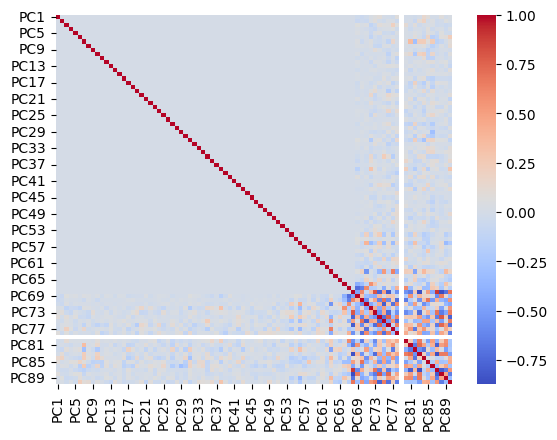

In [28]:
sns.heatmap(X_proj.corr(), cmap='coolwarm');

## Explained variance

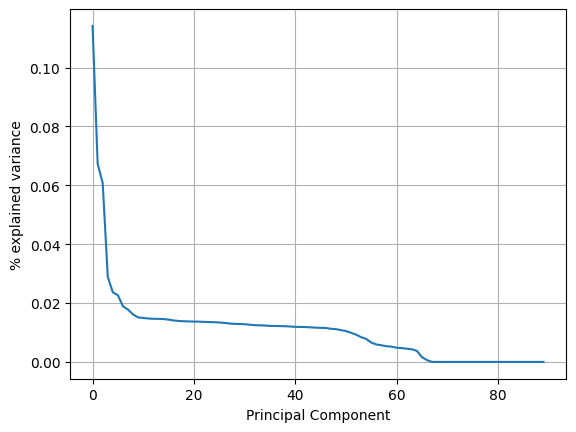

In [29]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');
plt.grid(visible=True)

## PCA for Dimensionality Reduction

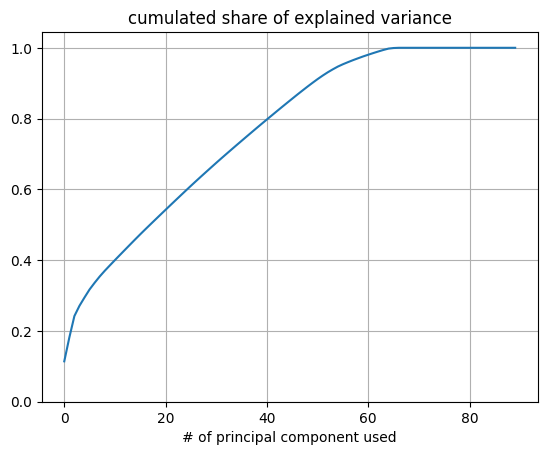

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');
plt.grid(visible=True)